<a href="https://colab.research.google.com/github/Juxtpawan/Deep-Learning-Repo/blob/main/GRUForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
#  Loading data
data = pd.read_csv('/content/GOOGHistoricalNOCP6m.csv')
data.info()


# Selecting three columns as input
data = data["NOCP"].values.reshape(-1, 1)
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      124 non-null    object 
 1   Trade DATE  124 non-null    object 
 2   NOCP        124 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB
[[1121.88]
 [1111.42]
 [1102.33]
 [1103.6 ]
 [1092.5 ]
 [1085.35]
 [1088.77]
 [1077.03]
 [1078.72]
 [1080.38]
 [1066.04]
 [1044.34]
 [1042.22]
 [1053.05]
 [1036.23]
 [1103.63]
 [1117.95]
 [1116.46]
 [1134.15]
 [1133.47]
 [1140.77]
 [1151.42]
 [1149.63]
 [1138.85]
 [1162.3 ]
 [1178.98]
 [1164.21]
 [1120.44]
 [1132.03]
 [1164.27]
 [1162.38]
 [1166.27]
 [1174.1 ]
 [1189.39]
 [1185.4 ]
 [1162.61]
 [1168.08]
 [1188.48]
 [1287.58]
 [1272.18]
 [1263.45]
 [1256.  ]
 [1264.55]
 [1248.84]
 [1236.37]
 [1236.34]
 [1227.13]
 [1221.1 ]
 [1217.87]
 [1204.62]
 [1202.16]
 [1197.25]
 [1203.84]
 [1207.15]
 [1215.  ]
 [1205.92]
 [1200.49]
 [1194.43]
 

In [ ]:
# Normalising the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create Sequence
def create_sequence(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 30
x, y = create_sequence(data, seq_length)

# Splitting int training
train_size = int(len(x) * 0.75)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential([
    GRU(64, input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(64),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 499ms/step - loss: 0.5741 - val_loss: 0.0216
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1819 - val_loss: 0.0147
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0281 - val_loss: 0.1024
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0547 - val_loss: 0.0800
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0271 - val_loss: 0.0290
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0294 - val_loss: 0.0112
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0265 - val_loss: 0.0185
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0159 - val_loss: 0.0353
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0122 - val_loss: 0.0502


In [ ]:
# Forecasting the next 30 days
last_sequence = data[-seq_length:]
last_sequence = last_sequence.reshape(1, seq_length, 1)

forecasted_data = []
for i in range(30):
    prediction = model.predict(last_sequence)
    forecasted_data.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the forecasted data
forecasted_data = scaler.inverse_transform(np.array(forecasted_data).reshape(-1, 1))
print(forecasted_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

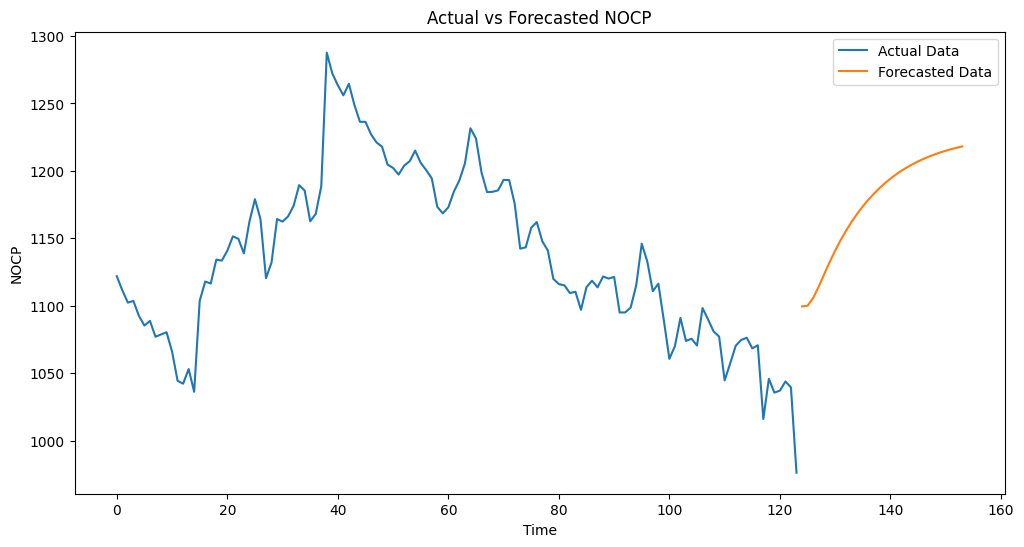

In [ ]:
# Plotting Graph
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual Data')
plt.plot(np.arange(len(data), len(data) + len(forecasted_data)), forecasted_data, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('NOCP')
plt.title('Actual vs Forecasted NOCP')
plt.legend()
plt.show()